# Interval geometries

With own stat:

- `geom_boxplot()`
- `geom_violin()`
- `geom_ydotplot()`

Without stat:

- `geom_errorbar()`
- `geom_crossbar()`
- `geom_linerange()`
- `geom_pointrange()`

Without geom:

- `stat_summary()`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


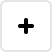
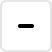
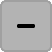
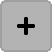
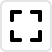
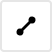
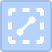
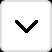
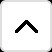
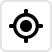
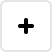
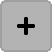
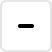
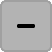
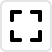
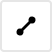
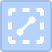
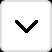
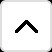
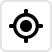

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

## [Issue #1319](https://github.com/JetBrains/lets-plot/issues/1319) - `geom_boxplot`: unable to draw a y-oriented plot with `stat='identity'`

In [4]:
def get_issue1319_data():
    return {
        'cat': ['a', 'b'],
        'min': [-4, -2],
        'lower': [-2, -1],
        'middle': [0, 0],
        'upper': [2, 1],
        'max': [4, 2]
    }

ggplot(get_issue1319_data()) + \
    geom_boxplot(aes(y='cat', xmin='min', xlower='lower', xmiddle='middle', xupper='upper', xmax='max'), stat='identity') + \
    ggtitle("EXPECTED: correct plot")

## Orientation tests

In [5]:
def aes_name(col_name, swap):
    custom_names = {"lower": "xlower", "xlower": "lower",
                    "upper": "xupper", "xupper": "upper",
                    "middle": "xmiddle", "xmiddle": "middle"}
    if not swap:
        return col_name
    if col_name in custom_names:
        return custom_names[col_name]
    elif "x" == col_name[0]:
        return "y" + col_name[1:]
    elif "y" == col_name[0]:
        return "x" + col_name[1:]
    else:
        return col_name

def get_oriented_plot(geom, data, *, stat=None, swap=False, orientation=None, flip=False, expected_text=None, mapping={}, parameters={}):
    geom_name = geom.__name__
    generated_parameters = {}
    generated_mapping = {aes_name(col_name, swap): col_name for col_name, col_values in data.items()}
    if 'color' in generated_mapping:
        generated_mapping['fill'] = generated_mapping['color']
        generated_parameters['alpha'] = .75
    final_mapping = {**generated_mapping, **mapping}
    if geom_name != "geom_ydotplot" and 'fill' in final_mapping:
        generated_parameters['position'] = position_dodge(width=.95)
    if stat is not None:
        generated_parameters['stat'] = stat
    if orientation is not None:
        generated_parameters['orientation'] = orientation
    final_parameters = {**generated_parameters, **parameters}
    if expected_text is None:
        if swap and orientation != 'y':
            if geom_name in ['geom_errorbar', 'geom_crossbar', 'geom_linerange', 'geom_pointrange']:
                expected_text = "correct plot"
            else:
                expected_text = "works if it can"
        elif not swap and orientation == 'y':
            expected_text = "incorrect plot"
        else:
            expected_text = "correct plot"
    p = ggplot(data) + \
        geom(aes(**final_mapping), **final_parameters) + \
        ggtitle("{geom}():{swap}\nstat={stat}, orientation={o}{flip}{expected}".format(
            geom=geom_name,
            stat=stat,
            o=orientation,
            swap="\nmapping is inverse" if swap else "",
            flip="\ncoordinates are flipped" if flip else "",
            expected="\nEXPECTED: {0}".format(expected_text),
        ))
    if flip:
        p += coord_flip()
    return p

### Boxplot

#### Default stat

In [6]:
# no x

box_data1 = {
    'y': [55, 53, 49, 47, 56, 54, 50, 48],
    'color': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data1),
    get_oriented_plot(geom_boxplot, box_data1, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data1, swap=True),
    get_oriented_plot(geom_boxplot, box_data1, flip=True),
    get_oriented_plot(geom_boxplot, box_data1, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data1, flip=True, swap=True),
], ncol=3)

In [7]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data1, orientation='y')

In [8]:
# x discrete, one value for each color

box_data2 = {
    'x': ['a'] * 8,
    'y': [55, 53, 49, 47, 56, 54, 50, 48],
    'color': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data2),
    get_oriented_plot(geom_boxplot, box_data2, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data2, swap=True),
    get_oriented_plot(geom_boxplot, box_data2, flip=True),
    get_oriented_plot(geom_boxplot, box_data2, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data2, flip=True, swap=True),
], ncol=3)

In [9]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data2, orientation='y')

In [10]:
# x discrete, few values for each color

box_data3 = {
    'x': ['a'] * 8 + ['b'] * 4,
    'y': [-55, -53, -49, -47, -56, -54, -50, -48,
          -50, -49, -47, -46],
    'color': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data3),
    get_oriented_plot(geom_boxplot, box_data3, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data3, swap=True),
    get_oriented_plot(geom_boxplot, box_data3, flip=True),
    get_oriented_plot(geom_boxplot, box_data3, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data3, flip=True, swap=True),
], ncol=3)

In [11]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data3, orientation='y')

In [12]:
# x continuous, one value for each color

box_data4 = {
    'x': [50] * 8,
    'y': [-102, -101, -99, -98, -103, -102, -100, -99],
    'color': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data4),
    get_oriented_plot(geom_boxplot, box_data4, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data4, swap=True),
    get_oriented_plot(geom_boxplot, box_data4, flip=True),
    get_oriented_plot(geom_boxplot, box_data4, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data4, flip=True, swap=True),
], ncol=3)

In [13]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data4, orientation='y')

In [14]:
# x continuous, few values for each color

box_data5 = {
    'x': [95] * 8 + [105] * 4,
    'y': [55, 53, 49, 47, 56, 54, 50, 48,
          50, 49, 47, 46],
    'color': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data5),
    get_oriented_plot(geom_boxplot, box_data5, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data5, swap=True),
    get_oriented_plot(geom_boxplot, box_data5, flip=True),
    get_oriented_plot(geom_boxplot, box_data5, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data5, flip=True, swap=True),
], ncol=3)

In [15]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data5, orientation='y')

#### `stat='identity'`

In [16]:
# no x

box_identity_data1 = {
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True, swap=True),
], ncol=3)

In [17]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', orientation='y')

In [18]:
# x discrete, one value for each color

box_identity_data2 = {
    'x': ['a', 'a'],
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True, swap=True),
], ncol=3)

In [19]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', orientation='y')

In [20]:
# x discrete, few values for each color

box_identity_data3 = {
    'x': ['a', 'a', 'b'],
    'ymin': [-23, -24, -21],
    'lower': [-22, -23, -20],
    'middle': [-21, -22, -19],
    'upper': [-20, -21, -18],
    'ymax': [-19, -20, -17],
    'color': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True, swap=True),
], ncol=3)

In [21]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', orientation='y')

In [22]:
# x continuous, one value for each color

box_identity_data4 = {
    'x': [100, 100],
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True, swap=True),
], ncol=3)

In [23]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', orientation='y')

In [24]:
# x continuous, few values for each color

box_identity_data5 = {
    'x': [-90, -90, -110],
    'ymin': [-23, -24, -21],
    'lower': [-22, -23, -20],
    'middle': [-21, -22, -19],
    'upper': [-20, -21, -18],
    'ymax': [-19, -20, -17],
    'color': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True, swap=True),
], ncol=3)

In [25]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', orientation='y')

### Violin

#### Default stat

In [26]:
# no x

gggrid([
    get_oriented_plot(geom_violin, box_data1),
    get_oriented_plot(geom_violin, box_data1, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data1, swap=True),
    get_oriented_plot(geom_violin, box_data1, flip=True),
    get_oriented_plot(geom_violin, box_data1, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data1, flip=True, swap=True),
], ncol=3)

In [27]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, box_data1, orientation='y')

In [28]:
# x discrete, one value for each color

gggrid([
    get_oriented_plot(geom_violin, box_data2),
    get_oriented_plot(geom_violin, box_data2, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data2, swap=True),
    get_oriented_plot(geom_violin, box_data2, flip=True),
    get_oriented_plot(geom_violin, box_data2, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data2, flip=True, swap=True),
], ncol=3)

In [29]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, box_data2, orientation='y')

In [30]:
# x discrete, few values for each color

gggrid([
    get_oriented_plot(geom_violin, box_data3),
    get_oriented_plot(geom_violin, box_data3, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data3, swap=True),
    get_oriented_plot(geom_violin, box_data3, flip=True),
    get_oriented_plot(geom_violin, box_data3, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data3, flip=True, swap=True),
], ncol=3)

In [31]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, box_data3, orientation='y')

In [32]:
# x continuous, one value for each color

gggrid([
    get_oriented_plot(geom_violin, box_data4),
    get_oriented_plot(geom_violin, box_data4, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data4, swap=True),
    get_oriented_plot(geom_violin, box_data4, flip=True),
    get_oriented_plot(geom_violin, box_data4, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data4, flip=True, swap=True),
], ncol=3)

In [33]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, box_data4, orientation='y')

In [34]:
# x continuous, few values for each color

gggrid([
    get_oriented_plot(geom_violin, box_data5),
    get_oriented_plot(geom_violin, box_data5, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data5, swap=True),
    get_oriented_plot(geom_violin, box_data5, flip=True),
    get_oriented_plot(geom_violin, box_data5, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, box_data5, flip=True, swap=True),
], ncol=3)

In [35]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, box_data5, orientation='y')

#### `stat='identity'`

In [36]:
# no x

violin_identity_data1 = {
    'y': [19, 20, 21, 20, 21, 22],
    'violinwidth': [.6, .8, .7, .7, .8, .6],
    'color': ['p'] * 3 + ['q'] * 3,
}

gggrid([
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity'),
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', swap=True),
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', flip=True),
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', flip=True, swap=True),
], ncol=3)

In [37]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, violin_identity_data1, stat='identity', orientation='y')

In [38]:
# x discrete, one value for each color

violin_identity_data2 = {
    'x': ['a'] * 6,
    'y': [19, 20, 21, 20, 21, 22],
    'violinwidth': [.6, .8, .7, .7, .8, .6],
    'color': ['p'] * 3 + ['q'] * 3,
}

gggrid([
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity'),
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', swap=True),
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', flip=True),
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', flip=True, swap=True),
], ncol=3)

In [39]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, violin_identity_data2, stat='identity', orientation='y')

In [40]:
# x discrete, few values for each color

violin_identity_data3 = {
    'x': ['a'] * 6 + ['b'] * 3,
    'y': [-23, -24, -25, -24, -25, -26, -21, -22, -23],
    'violinwidth': [.4, .8, .6] * 3,
    'color': ['p'] * 3 + ['q'] * 3 + ['p'] * 3,
}

gggrid([
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity'),
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', swap=True),
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', flip=True),
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', flip=True, swap=True),
], ncol=3)

In [41]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, violin_identity_data3, stat='identity', orientation='y')

In [42]:
# x continuous, one value for each color

violin_identity_data4 = {
    'x': [100] * 6,
    'y': [19, 20, 21, 20, 21, 22],
    'violinwidth': [.6, .8, .7, .7, .8, .6],
    'color': ['p'] * 3 + ['q'] * 3,
}

gggrid([
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity'),
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', swap=True),
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', flip=True),
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', flip=True, swap=True),
], ncol=3)

In [43]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, violin_identity_data4, stat='identity', orientation='y')

In [44]:
# x continuous, few values for each color

violin_identity_data5 = {
    'x': [-90] * 6 + [-100] * 3,
    'y': [-23, -24, -25, -24, -25, -26, -21, -22, -23],
    'violinwidth': [.4, .8, .6] * 3,
    'color': ['p'] * 3 + ['q'] * 3 + ['p'] * 3,
}

gggrid([
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity'),
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', swap=True),
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', flip=True),
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', flip=True, swap=True),
], ncol=3)

In [45]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_violin, violin_identity_data5, stat='identity', orientation='y')

### YDotplot

#### Default stat

In [46]:
# no x

ydotplot_data1 = {
    'y': [55, 53, 53, 47, 56, 50, 50, 48],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}),
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}, swap=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}, flip=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data1, parameters={'binwidth': 2}, flip=True, swap=True),
], ncol=3)

In [47]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_ydotplot, ydotplot_data1, orientation='y')

In [48]:
# x discrete, one value for each color

ydotplot_data2 = {
    'x': ['a'] * 8,
    'y': [55, 53, 53, 47, 56, 50, 50, 48],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}),
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}, swap=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}, flip=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data2, parameters={'binwidth': 2}, flip=True, swap=True),
], ncol=3)

In [49]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_ydotplot, ydotplot_data2, orientation='y')

In [50]:
# x discrete, few values for each color

ydotplot_data3 = {
    'x': ['a'] * 8 + ['b'] * 4,
    'y': [-55, -53, -53, -47, -56, -50, -50, -48,
          -50, -49, -46, -46],
    'fill': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}),
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}, swap=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}, flip=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data3, parameters={'binwidth': 1}, flip=True, swap=True),
], ncol=3)

In [51]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_ydotplot, ydotplot_data3, orientation='y')

In [52]:
# x continuous, one value for each color

ydotplot_data4 = {
    'x': [100] * 8,
    'y': [55, 53, 53, 47, 56, 50, 50, 48],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}),
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}, swap=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}, flip=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data4, parameters={'binwidth': 2}, flip=True, swap=True),
], ncol=3)

In [53]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_ydotplot, ydotplot_data4, orientation='y')

In [54]:
# x continuous, few values for each color

ydotplot_data5 = {
    'x': [95] * 8 + [105] * 4,
    'y': [-55, -53, -53, -47, -56, -50, -50, -48,
          -50, -49, -46, -46],
    'fill': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}),
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}, swap=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}, flip=True),
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_ydotplot, ydotplot_data5, parameters={'binwidth': 1}, flip=True, swap=True),
], ncol=3)

In [55]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_ydotplot, ydotplot_data5, orientation='y')

### Crossbar

In [56]:
# no x

crossbar_data1 = {
    'ymin': [19, 20],
    'y': [20, 21],
    'ymax': [21, 22],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_crossbar, crossbar_data1),
    get_oriented_plot(geom_crossbar, crossbar_data1, swap=True),
    get_oriented_plot(geom_crossbar, crossbar_data1, flip=True),
    get_oriented_plot(geom_crossbar, crossbar_data1, flip=True, swap=True),
], ncol=2)

In [57]:
# x discrete, one value for each color

crossbar_data2 = {
    'x': ['a', 'a'],
    'ymin': [19, 20],
    'y': [20, 21],
    'ymax': [21, 22],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_crossbar, crossbar_data2),
    get_oriented_plot(geom_crossbar, crossbar_data2, swap=True),
    get_oriented_plot(geom_crossbar, crossbar_data2, flip=True),
    get_oriented_plot(geom_crossbar, crossbar_data2, flip=True, swap=True),
], ncol=2)

In [58]:
# x discrete, few values for each color

crossbar_data3 = {
    'x': ['a', 'a', 'b'],
    'ymin': [19, 21, 20],
    'y': [20, 22, 21],
    'ymax': [21, 23, 22],
    'color': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_crossbar, crossbar_data3),
    get_oriented_plot(geom_crossbar, crossbar_data3, swap=True),
    get_oriented_plot(geom_crossbar, crossbar_data3, flip=True),
    get_oriented_plot(geom_crossbar, crossbar_data3, flip=True, swap=True),
], ncol=2)

In [59]:
# x continuous, one value for each color

crossbar_data4 = {
    'x': [50, 50],
    'ymin': [19, 20],
    'y': [20, 21],
    'ymax': [21, 22],
    'color': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_crossbar, crossbar_data4),
    get_oriented_plot(geom_crossbar, crossbar_data4, swap=True),
    get_oriented_plot(geom_crossbar, crossbar_data4, flip=True),
    get_oriented_plot(geom_crossbar, crossbar_data4, flip=True, swap=True),
], ncol=2)

In [60]:
# x continuous, few values for each color

crossbar_data5 = {
    'x': [95, 95, 105],
    'ymin': [19, 21, 20],
    'y': [20, 22, 21],
    'ymax': [21, 23, 22],
    'color': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_crossbar, crossbar_data5),
    get_oriented_plot(geom_crossbar, crossbar_data5, swap=True),
    get_oriented_plot(geom_crossbar, crossbar_data5, flip=True),
    get_oriented_plot(geom_crossbar, crossbar_data5, flip=True, swap=True),
], ncol=2)

### Errorbar

In [61]:
# no x

gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data1),
    get_oriented_plot(geom_errorbar, crossbar_data1, swap=True),
    get_oriented_plot(geom_errorbar, crossbar_data1, flip=True),
    get_oriented_plot(geom_errorbar, crossbar_data1, flip=True, swap=True),
], ncol=2)

In [62]:
# x discrete, one value for each color

gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data2),
    get_oriented_plot(geom_errorbar, crossbar_data2, swap=True),
    get_oriented_plot(geom_errorbar, crossbar_data2, flip=True),
    get_oriented_plot(geom_errorbar, crossbar_data2, flip=True, swap=True),
], ncol=2)

In [63]:
# x discrete, few values for each color

gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data3),
    get_oriented_plot(geom_errorbar, crossbar_data3, swap=True),
    get_oriented_plot(geom_errorbar, crossbar_data3, flip=True),
    get_oriented_plot(geom_errorbar, crossbar_data3, flip=True, swap=True),
], ncol=2)

In [64]:
# x continuous, one value for each color

gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data4),
    get_oriented_plot(geom_errorbar, crossbar_data4, swap=True),
    get_oriented_plot(geom_errorbar, crossbar_data4, flip=True),
    get_oriented_plot(geom_errorbar, crossbar_data4, flip=True, swap=True),
], ncol=2)

In [65]:
# x continuous, few values for each color

gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data5),
    get_oriented_plot(geom_errorbar, crossbar_data5, swap=True),
    get_oriented_plot(geom_errorbar, crossbar_data5, flip=True),
    get_oriented_plot(geom_errorbar, crossbar_data5, flip=True, swap=True),
], ncol=2)

### Linerange

In [66]:
# no x

gggrid([
    get_oriented_plot(geom_linerange, crossbar_data1, parameters={'size': 5}),
    get_oriented_plot(geom_linerange, crossbar_data1, parameters={'size': 5}, swap=True),
    get_oriented_plot(geom_linerange, crossbar_data1, parameters={'size': 5}, flip=True),
    get_oriented_plot(geom_linerange, crossbar_data1, parameters={'size': 5}, flip=True, swap=True),
], ncol=2)

In [67]:
# x discrete, one value for each color

gggrid([
    get_oriented_plot(geom_linerange, crossbar_data2, parameters={'size': 5}),
    get_oriented_plot(geom_linerange, crossbar_data2, parameters={'size': 5}, swap=True),
    get_oriented_plot(geom_linerange, crossbar_data2, parameters={'size': 5}, flip=True),
    get_oriented_plot(geom_linerange, crossbar_data2, parameters={'size': 5}, flip=True, swap=True),
], ncol=2)

In [68]:
# x discrete, few values for each color

gggrid([
    get_oriented_plot(geom_linerange, crossbar_data3, parameters={'size': 5}),
    get_oriented_plot(geom_linerange, crossbar_data3, parameters={'size': 5}, swap=True),
    get_oriented_plot(geom_linerange, crossbar_data3, parameters={'size': 5}, flip=True),
    get_oriented_plot(geom_linerange, crossbar_data3, parameters={'size': 5}, flip=True, swap=True),
], ncol=2)

In [69]:
# x continuous, one value for each color

gggrid([
    get_oriented_plot(geom_linerange, crossbar_data4, parameters={'size': 5}),
    get_oriented_plot(geom_linerange, crossbar_data4, parameters={'size': 5}, swap=True),
    get_oriented_plot(geom_linerange, crossbar_data4, parameters={'size': 5}, flip=True),
    get_oriented_plot(geom_linerange, crossbar_data4, parameters={'size': 5}, flip=True, swap=True),
], ncol=2)

In [70]:
# x continuous, few values for each color

gggrid([
    get_oriented_plot(geom_linerange, crossbar_data5, parameters={'size': 5}),
    get_oriented_plot(geom_linerange, crossbar_data5, parameters={'size': 5}, swap=True),
    get_oriented_plot(geom_linerange, crossbar_data5, parameters={'size': 5}, flip=True),
    get_oriented_plot(geom_linerange, crossbar_data5, parameters={'size': 5}, flip=True, swap=True),
], ncol=2)

### Pointrange

In [71]:
# no x

gggrid([
    get_oriented_plot(geom_pointrange, crossbar_data1, parameters={'fatten': 10}),
    get_oriented_plot(geom_pointrange, crossbar_data1, parameters={'fatten': 10}, swap=True),
    get_oriented_plot(geom_pointrange, crossbar_data1, parameters={'fatten': 10}, flip=True),
    get_oriented_plot(geom_pointrange, crossbar_data1, parameters={'fatten': 10}, flip=True, swap=True),
], ncol=2)

In [72]:
# x discrete, one value for each color

gggrid([
    get_oriented_plot(geom_pointrange, crossbar_data2, parameters={'fatten': 10}),
    get_oriented_plot(geom_pointrange, crossbar_data2, parameters={'fatten': 10}, swap=True),
    get_oriented_plot(geom_pointrange, crossbar_data2, parameters={'fatten': 10}, flip=True),
    get_oriented_plot(geom_pointrange, crossbar_data2, parameters={'fatten': 10}, flip=True, swap=True),
], ncol=2)

In [73]:
# x discrete, few values for each color

gggrid([
    get_oriented_plot(geom_pointrange, crossbar_data3, parameters={'fatten': 10}),
    get_oriented_plot(geom_pointrange, crossbar_data3, parameters={'fatten': 10}, swap=True),
    get_oriented_plot(geom_pointrange, crossbar_data3, parameters={'fatten': 10}, flip=True),
    get_oriented_plot(geom_pointrange, crossbar_data3, parameters={'fatten': 10}, flip=True, swap=True),
], ncol=2)

In [74]:
# x continuous, one value for each color

gggrid([
    get_oriented_plot(geom_pointrange, crossbar_data4, parameters={'fatten': 10}),
    get_oriented_plot(geom_pointrange, crossbar_data4, parameters={'fatten': 10}, swap=True),
    get_oriented_plot(geom_pointrange, crossbar_data4, parameters={'fatten': 10}, flip=True),
    get_oriented_plot(geom_pointrange, crossbar_data4, parameters={'fatten': 10}, flip=True, swap=True),
], ncol=2)

In [75]:
# x continuous, few values for each color

gggrid([
    get_oriented_plot(geom_pointrange, crossbar_data5, parameters={'fatten': 10}),
    get_oriented_plot(geom_pointrange, crossbar_data5, parameters={'fatten': 10}, swap=True),
    get_oriented_plot(geom_pointrange, crossbar_data5, parameters={'fatten': 10}, flip=True),
    get_oriented_plot(geom_pointrange, crossbar_data5, parameters={'fatten': 10}, flip=True, swap=True),
], ncol=2)

### Summary stat

In [76]:
# no x

gggrid([
    get_oriented_plot(stat_summary, box_data1),
    get_oriented_plot(stat_summary, box_data1, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data1, swap=True),
    get_oriented_plot(stat_summary, box_data1, flip=True),
    get_oriented_plot(stat_summary, box_data1, flip=True, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data1, flip=True, swap=True),
], ncol=3)

In [77]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(stat_summary, box_data1, orientation='y')

In [78]:
# x discrete, one value for each color

gggrid([
    get_oriented_plot(stat_summary, box_data2),
    get_oriented_plot(stat_summary, box_data2, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data2, swap=True),
    get_oriented_plot(stat_summary, box_data2, flip=True),
    get_oriented_plot(stat_summary, box_data2, flip=True, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data2, flip=True, swap=True),
], ncol=3)

In [79]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(stat_summary, box_data2, orientation='y')

In [80]:
# x discrete, few values for each color

gggrid([
    get_oriented_plot(stat_summary, box_data3),
    get_oriented_plot(stat_summary, box_data3, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data3, swap=True),
    get_oriented_plot(stat_summary, box_data3, flip=True),
    get_oriented_plot(stat_summary, box_data3, flip=True, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data3, flip=True, swap=True),
], ncol=3)

In [81]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(stat_summary, box_data3, orientation='y')

In [82]:
# x continuous, one value for each color

gggrid([
    get_oriented_plot(stat_summary, box_data4),
    get_oriented_plot(stat_summary, box_data4, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data4, swap=True),
    get_oriented_plot(stat_summary, box_data4, flip=True),
    get_oriented_plot(stat_summary, box_data4, flip=True, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data4, flip=True, swap=True),
], ncol=3)

In [83]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(stat_summary, box_data4, orientation='y')

In [84]:
# x continuous, few values for each color

gggrid([
    get_oriented_plot(stat_summary, box_data5),
    get_oriented_plot(stat_summary, box_data5, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data5, swap=True),
    get_oriented_plot(stat_summary, box_data5, flip=True),
    get_oriented_plot(stat_summary, box_data5, flip=True, swap=True, orientation='y'),
    get_oriented_plot(stat_summary, box_data5, flip=True, swap=True),
], ncol=3)

In [85]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(stat_summary, box_data5, orientation='y')

## Additional tests

### Tooltips

In [86]:
def get_boxplot_tooltips_plot(data, constants, *, swap=False, orientation=None, stat=None):
    mapping = {aes_name(col_name, swap): col_name for col_name, col_values in data.items()}
    scale_pos = scale_x_continuous if swap else scale_y_continuous
    tooltips = layer_tooltips()
    for aes_key in ["lower", "middle", "upper"]:
        swapped_aes_key = aes_name(aes_key, swap)
        tooltip_aes_key = "^" + swapped_aes_key
        tooltips = tooltips.line("{name} ({const}{formatted})|{tooltip_name}".format(
            name=swapped_aes_key,
            const="const" if aes_key in constants else "var",
            formatted="" if aes_key == "middle" else ", formatted",
            tooltip_name=tooltip_aes_key,
        ))
        if aes_key != "middle":
            tooltips = tooltips.format(tooltip_aes_key, "[{.1f}]")
    return ggplot(data, aes(**mapping)) + \
        geom_boxplot(stat=stat, orientation=orientation, tooltips=tooltips,
                     **{aes_name(k, swap): v for k, v in constants.items()}) + \
        scale_pos(format=".3f") + \
        ggtitle("{swap}stat={stat}, orientation={o}{expected}".format(
            stat=stat,
            o=orientation,
            swap="mapping is inverse\n" if swap else "",
            expected="\nEXPECTED:\n- tooltips for lower, middle, upper\n- side tooltip for ymax\n- axis tooltip for categorical axis",
        ))

box_constants3 = {'ymin': -57, 'lower': -56, 'middle': -53}
box_identity_constants3 = {'ymin': -25, 'lower': -24, 'middle': -23}
gggrid([
    get_boxplot_tooltips_plot(box_data3, box_constants3),
    get_boxplot_tooltips_plot(box_data3, box_constants3, swap=True),
    get_boxplot_tooltips_plot(box_data3, box_constants3, orientation='x'),
    get_boxplot_tooltips_plot(box_data3, box_constants3, swap=True, orientation='y'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', swap=True),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', orientation='x'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', swap=True, orientation='y'),
], ncol=2)

### Constants (regression)

In [87]:
gggrid([
    ggplot(box_data3, aes('x', 'y', color='color')) + \
        geom_boxplot(ymin=-57) + \
        scale_y_continuous(trans='symlog') + \
        ggtitle("EXPECTED: correct plot"),
    ggplot(box_data3, aes('y', 'x', color='color')) + \
        geom_boxplot(xmin=-57) + \
        scale_x_continuous(trans='symlog') + \
        ggtitle("EXPECTED: correct plot"),
    ggplot(box_identity_data3, aes(x='x', lower='lower', middle='middle', upper='upper', ymax='ymax', color='color')) + \
        geom_boxplot(stat='identity', ymin=-25) + \
        scale_y_continuous(trans='symlog') + \
        ggtitle("EXPECTED: correct plot"),
    ggplot(box_identity_data3, aes(y='x', xlower='lower', xmiddle='middle', xupper='upper', xmax='ymax', color='color')) + \
        geom_boxplot(stat='identity', xmin=-25) + \
        scale_x_continuous(trans='symlog') + \
        ggtitle("EXPECTED: correct plot"),
], ncol=2)

### Marginal layers (regression)

In [88]:
def marginal_layer_plot(geom, parameters={}):
    data = {
        'x': [i**1.3 for i in range(10)] + [i**1.7 for i in range(10)],
        'y': list(range(10)) + [4.5 - i / 2.0 for i in range(10)],
        'color': ['a'] * 10 + ['b'] * 10,
    }
    geom_name = geom.__name__
    return ggplot(data, aes('x', 'y', color='color', fill='color')) + \
        geom_point(size=5, alpha=.5) + \
        scale_x_continuous(trans='sqrt') + \
        ggmarginal("tr", layer=geom(alpha=.5, **parameters)) + \
        ggtitle("{0}({1})\nEXPECTED: correct plot".format(
            geom_name,
            ", ".join(["{0}='{1}'".format(k, v) for k, v in parameters.items()])
        ))

gggrid([
    marginal_layer_plot(geom_boxplot),
    marginal_layer_plot(geom_violin),
    marginal_layer_plot(geom_ydotplot),
    marginal_layer_plot(stat_summary),
    marginal_layer_plot(geom_crossbar, {'stat': 'boxplot', 'position': 'dodge'}),
    marginal_layer_plot(geom_crossbar, {'stat': 'summary', 'position': 'dodge'}),
    marginal_layer_plot(geom_errorbar, {'stat': 'boxplot', 'position': 'dodge'}),
    marginal_layer_plot(geom_errorbar, {'stat': 'summary', 'position': 'dodge'}),
    marginal_layer_plot(geom_linerange, {'stat': 'boxplot', 'position': 'dodge'}),
    marginal_layer_plot(geom_linerange, {'stat': 'summary', 'position': 'dodge'}),
    marginal_layer_plot(geom_pointrange, {'stat': 'boxplot', 'position': 'dodge'}),
    marginal_layer_plot(geom_pointrange, {'stat': 'summary', 'position': 'dodge'}),
    marginal_layer_plot(geom_density),
    marginal_layer_plot(geom_histogram, {'binwidth': 2}),
], ncol=2)

### Extra aesthetics

In [89]:
def extra_aes_plot(xs=None, ys=None):
    extra_data_x = {
        'ymin': [-104, -102],
        'lower': [-102, -101],
        'middle': [-100, -100],
        'upper': [-98, -99],
        'ymax': [-96, -98],
    }
    if xs is not None:
        extra_data_x['x'] = xs
    extra_data_y = {
        'xmin': [90, 94],
        'xlower': [95, 97],
        'xmiddle': [100, 100],
        'xupper': [105, 103],
        'xmax': [110, 106],
    }
    if ys is not None:
        extra_data_y['y'] = ys
    extra_data = {**extra_data_x, **extra_data_y}
    
    data_to_mapping = lambda d: {col: col for col, v in d.items()}
    extra_mapping_x = data_to_mapping(extra_data_x)
    extra_mapping_y = data_to_mapping(extra_data_y)
    extra_mapping = data_to_mapping(extra_data)
    
    print_mapping = lambda m, name: print("Mapping {0}:\n{1}\n".format(
        name,
        '\n'.join(["  {0}: {1}".format(k, v) for k, v in m.items()])
    ))
    print_mapping(extra_mapping_x, "extra_mapping_x")
    print_mapping(extra_mapping_y, "extra_mapping_y")
    print_mapping(extra_mapping, "extra_mapping")
    
    return gggrid([
        ggplot(extra_data_x, aes(**extra_mapping_x)) + \
            geom_boxplot(stat='identity') + \
            ggtitle("x\nEXPECTED: nothing"),
        ggplot(extra_data_y, aes(**extra_mapping_y)) + \
            geom_boxplot(stat='identity') + \
            ggtitle("y\nEXPECTED: nothing"),
        ggplot(extra_data, aes(**extra_mapping)) + \
            geom_boxplot(stat='identity') + \
            ggtitle("both\nEXPECTED: nothing"),
        ggplot(extra_data, aes(**extra_mapping)) + \
            geom_boxplot(stat='identity', orientation='x') + \
            ggtitle("both, orientation='x'\nEXPECTED: nothing"),
        ggplot(extra_data, aes(**extra_mapping)) + \
            geom_boxplot(stat='identity', orientation='y') + \
            ggtitle("both, orientation='y'\nEXPECTED: nothing"),
    ], ncol=3)

In [90]:
extra_aes_plot()

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax



In [91]:
extra_aes_plot(['a', 'b'], ['c', 'd'])

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y



In [92]:
extra_aes_plot([2, 4], [-3, -6])

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y



### Positioning (regression)

In [93]:
gggrid([
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': None}) + \
        ggtitle("no x\nposition=None\nEXPECTED: identity pos", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': 'dodge'}) + \
        ggtitle("no x\nposition='dodge'\nEXPECTED: small gaps around", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': position_dodge(.95)}) + \
        ggtitle("no x\nposition=position_dodge(.95)\nEXPECTED: as previous", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': None}, swap=True, orientation='y') + \
        ggtitle("no x\nposition=None\nEXPECTED: identity pos", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': 'dodge'}, swap=True, orientation='y') + \
        ggtitle("no x\nposition='dodge'\nEXPECTED: small gaps around", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data1, parameters={'position': position_dodge(.95)}, swap=True, orientation='y') + \
        ggtitle("no x\nposition=position_dodge(.95)\nEXPECTED: as previous", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': None}) + \
        ggtitle("discrete x\nposition=None\nEXPECTED: identity pos", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': 'dodge'}) + \
        ggtitle("discrete x\nposition='dodge'\nEXPECTED: small gaps around", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': position_dodge(.95)}) + \
        ggtitle("discrete x\nposition=position_dodge(.95)\nEXPECTED: as previous", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': None}, swap=True, orientation='y') + \
        ggtitle("discrete x\nposition=None\nEXPECTED: identity pos", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': 'dodge'}, swap=True, orientation='y') + \
        ggtitle("discrete x\nposition='dodge'\nEXPECTED: small gaps around", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data2, parameters={'position': position_dodge(.95)}, swap=True, orientation='y') + \
        ggtitle("discrete x\nposition=position_dodge(.95)\nEXPECTED: as previous", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': None}) + \
        ggtitle("continuous x\nposition=None\nEXPECTED: identity pos", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': 'dodge'}) + \
        ggtitle("continuous x\nposition='dodge'\nEXPECTED: small gaps around", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': position_dodge(.95)}) + \
        ggtitle("continuous x\nposition=position_dodge(.95)\nEXPECTED: as previous", "Default orientation"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': None}, swap=True, orientation='y') + \
        ggtitle("continuous x\nposition=None\nEXPECTED: identity pos", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': 'dodge'}, swap=True, orientation='y') + \
        ggtitle("continuous x\nposition='dodge'\nEXPECTED: small gaps around", "orientation='y'"),
    get_oriented_plot(geom_errorbar, crossbar_data4, parameters={'position': position_dodge(.95)}, swap=True, orientation='y') + \
        ggtitle("continuous x\nposition=position_dodge(.95)\nEXPECTED: as previous", "orientation='y'"),
], ncol=3)

### Midline (regression)

In [94]:
no_midline_data1 = {
    'ymin': [-23, -22],
    'ymax': [-21, -20],
    'color': ['a', 'b'],
}
mo_midline_data2 = {
    'x': [100, 100],
    'ymin': [-23, -22],
    'ymax': [-21, -20],
    'color': ['a', 'b'],
}

gggrid([
    get_oriented_plot(geom_crossbar, no_midline_data1),
    get_oriented_plot(geom_crossbar, mo_midline_data2),
    get_oriented_plot(geom_crossbar, no_midline_data1, swap=True),
    get_oriented_plot(geom_crossbar, mo_midline_data2, swap=True),
], ncol=2)

### `coord_map()` (regression)

In [95]:
def coord_map_plot(geom, orientation, *, min_aes='ymin', max_aes='ymax', middle_aes=None):
    cat_aes = 'x'
    cat_value = -15
    min_value, middle_value, max_value = 19, 20, 21
    aes_constants = {cat_aes: cat_value, min_aes: min_value, max_aes: max_value}
    if middle_aes is not None:
        aes_constants[middle_aes] = middle_value
    if orientation == 'y':
        aes_constants = {aes_name(k, True): v for k, v in aes_constants.items()}
    
    return ggplot() + \
        geom(stat='identity', size=3, color='green', **aes_constants) + \
        geom_segment(size=1, color='red',
                   **{aes_name('x', orientation == 'y'): cat_value,
                      aes_name('y', orientation == 'y'): min_value,
                      aes_name('xend', orientation == 'y'): cat_value,
                      aes_name('yend', orientation == 'y'): max_value}) + \
        coord_map() + \
        ggtitle("{0}()\nEXPECTED: green interval\nlimited by the red line".format(
            geom.__name__
        ))

gggrid([
    coord_map_plot(geom_crossbar, 'x'), coord_map_plot(geom_crossbar, 'y'),
    coord_map_plot(geom_errorbar, 'x'), coord_map_plot(geom_errorbar, 'y'),
    coord_map_plot(geom_linerange, 'x'), coord_map_plot(geom_linerange, 'y'),
    coord_map_plot(geom_pointrange, 'x', middle_aes='y'), coord_map_plot(geom_pointrange, 'y', middle_aes='y'),
    coord_map_plot(geom_boxplot, 'x', min_aes='lower', max_aes='upper'), coord_map_plot(geom_boxplot, 'y', min_aes='lower', max_aes='upper'),
], ncol=2)

### Other geoms that may have broken

These geometries are either "oriented" (not symmetrical about the axes) or have "positional" aesthetics (`ymin`, `lower`, ...).

With own stat:

- `geom_bar()` (oriented)
- `geom_smooth()` (`ymin`/`ymax`)

Without stat:

- `geom_ribbon()` (`ymin`/`ymax`)
- `geom_lollipop()` (oriented)
- `geom_band()` (`ymin`/`ymax`)

#### `geom_bar()`

In [96]:
bar_data = {
    'x': ['a', 'a', 'b'],
}

bar_identity_data = {
    'x': ['a', 'b'],
    'y': [1, 2],
}

gggrid([
    get_oriented_plot(geom_bar, bar_data),
    get_oriented_plot(geom_bar, bar_data, swap=True, orientation='y'),
    get_oriented_plot(geom_bar, bar_data, swap=True),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity'),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity', swap=True, orientation='y', expected_text="correct plot"),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity', swap=True, expected_text="correct plot"),
], ncol=3)

In [97]:
# With polar coordinates (regression)

gggrid([
    get_oriented_plot(geom_bar, bar_data) + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_y='blank'),
    get_oriented_plot(geom_bar, bar_data, swap=True, orientation='y') + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_x='blank'),
    get_oriented_plot(geom_bar, bar_data, swap=True) + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_x='blank'),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity') + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_y='blank'),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity', swap=True, orientation='y', expected_text="correct plot") + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_x='blank'),
    get_oriented_plot(geom_bar, bar_identity_data, stat='identity', swap=True, expected_text="correct plot") + \
        coord_polar() + \
        theme(axis_title='blank', axis_text_x='blank'),
], ncol=3)

#### `geom_smooth()`

In [98]:
smooth_data = {
    'x': [0, 1, 2],
    'y': [0, .8, 2.2],
}

smooth_identity_data = {
    'x': [-1, 0, 1],
    'ymin': [-2.5, -.25, 0],
    'y': [-2, 0, .5],
    'ymax': [-1, .5, 1.5],
}

gggrid([
    get_oriented_plot(geom_smooth, smooth_data),
    get_oriented_plot(geom_smooth, smooth_data, swap=True, orientation='y'),
    get_oriented_plot(geom_smooth, smooth_data, swap=True),
    get_oriented_plot(geom_smooth, smooth_identity_data, stat='identity'),
    get_oriented_plot(geom_smooth, smooth_identity_data, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_smooth, smooth_identity_data, stat='identity', swap=True),
], ncol=3)

#### `geom_ribbon()`

In [99]:
ribbon_data = {
    'x': [-1, 1],
    'ymin': [-2, -1],
    'ymax': [1, 2],
}

gggrid([
    get_oriented_plot(geom_ribbon, ribbon_data),
    get_oriented_plot(geom_ribbon, ribbon_data, swap=True, expected_text="correct plot"),
], ncol=3)

#### `geom_lollipop()`

In [100]:
lollipop_data = {
    'x': [2, 3],
    'y': [12, 8],
}

gggrid([
    get_oriented_plot(geom_lollipop, lollipop_data),
    get_oriented_plot(geom_lollipop, lollipop_data, swap=True, orientation='y'),
    get_oriented_plot(geom_lollipop, lollipop_data, swap=True, expected_text="correct plot"),
], ncol=3)

#### `geom_band()`

In [101]:
band_data = {
    'ymin': [-4, 2],
    'ymax': [-2, 4],
}

gggrid([
    get_oriented_plot(geom_band, band_data),
    get_oriented_plot(geom_band, band_data, swap=True, expected_text="correct plot"),
], ncol=3)

In [102]:
# With polar coordinates (regression)

gggrid([
    get_oriented_plot(geom_band, band_data) + \
        coord_polar(ylim=[-6, 6]) + \
        theme(axis_title='blank'),
    get_oriented_plot(geom_band, band_data, swap=True, expected_text="correct plot") + \
        coord_polar(xlim=[-6, 6]) + \
        theme(axis_title='blank'),
], ncol=3)

## [ggplot2-like examples](https://ggplot2.tidyverse.org/reference/geom_boxplot.html#ref-examples)

In [103]:
ggplot2_plot = ggplot(df, aes("class", "hwy"))
ggplot2_plot + geom_boxplot()

In [104]:
# Orientation follows the discrete axis
ggplot(df, aes("hwy", "class")) + geom_boxplot()

In [105]:
ggplot2_plot + geom_boxplot(varwidth=True)

In [106]:
ggplot2_plot + geom_boxplot(fill="white", color="#3366FF")

In [107]:
# By default, outlier points match the colour of the box. Use outlier_color to override
ggplot2_plot + geom_boxplot(outlier_color="red", outlier_shape=1)

In [108]:
# Remove outliers when overlaying boxplot with original data points
ggplot2_plot + geom_boxplot(outlier_color="transparent") + geom_jitter(width=0.2, seed=42)

In [109]:
# Boxplots are automatically dodged when any aesthetic is a factor
ggplot2_plot + geom_boxplot(aes(color="drv"))

In [110]:
# It's possible to draw a boxplot with your own computations if you use stat="identity":
def get_ggplot2_identity_data(*, seed=42):
    np.random.seed(seed)
    y = np.random.normal(size=100)
    return {
        'x': [1],
        'y0': [float(min(y))],
        'y25': [float(np.quantile(y, .25))],
        'y50': [float(np.median(y))],
        'y75': [float(np.quantile(y, .75))],
        'y100': [float(max(y))],
    }

ggplot(get_ggplot2_identity_data(), aes(x='x')) + \
    geom_boxplot(aes(ymin='y0', lower='y25', middle='y50', upper='y75', ymax='y100'),
                 stat='identity')